In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('survey_results_public.csv')

In [2]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [4]:
df = df[['Country','EdLevel','YearsCodePro','Employment', 'CompTotal']] # keep important columns
df = df.rename({'CompTotal': 'Salary'}, axis=1) # rename ConvertedCompYearly to Salary

In [5]:
df = df[df['Salary'].notnull()]
df.head()


,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",1320000.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",78000.0


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 48225 entries, 1 to 89183
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48225 non-null  object 
 1   EdLevel       48225 non-null  object 
 2   YearsCodePro  48023 non-null  object 
 3   Employment    48213 non-null  object 
 4   Salary        48225 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [7]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [8]:
df = df[df['Employment'] == 'Employed, full-time'] #only entry points when the person is employed full time
df = df.drop('Employment', axis=1)# we don't need employment for our regression model, we used it to filter the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39241 entries, 1 to 89183
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39241 non-null  object 
 1   EdLevel       39241 non-null  object 
 2   YearsCodePro  39241 non-null  object 
 3   Salary        39241 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [9]:
df['Country'].value_counts()

Country
United States of America                                10577
Germany                                                  3202
United Kingdom of Great Britain and Northern Ireland     3074
Canada                                                   1808
India                                                    1631
                                                        ...  
Guinea-Bissau                                               1
Sierra Leone                                                1
Guyana                                                      1
Timor-Leste                                                 1
Antigua and Barbuda                                         1
Name: count, Length: 167, dtype: int64

In [10]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'other'
    return categorical_map

In [11]:
country_map = shorten_categories(df.Country.value_counts(), 800)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
other                                                   11853
United States of America                                10577
Germany                                                  3202
United Kingdom of Great Britain and Northern Ireland     3074
Canada                                                   1808
India                                                    1631
France                                                   1458
Netherlands                                              1003
Australia                                                 985
Brazil                                                    973
Spain                                                     967
Sweden                                                    883
Italy                                                     827
Name: count, dtype: int64

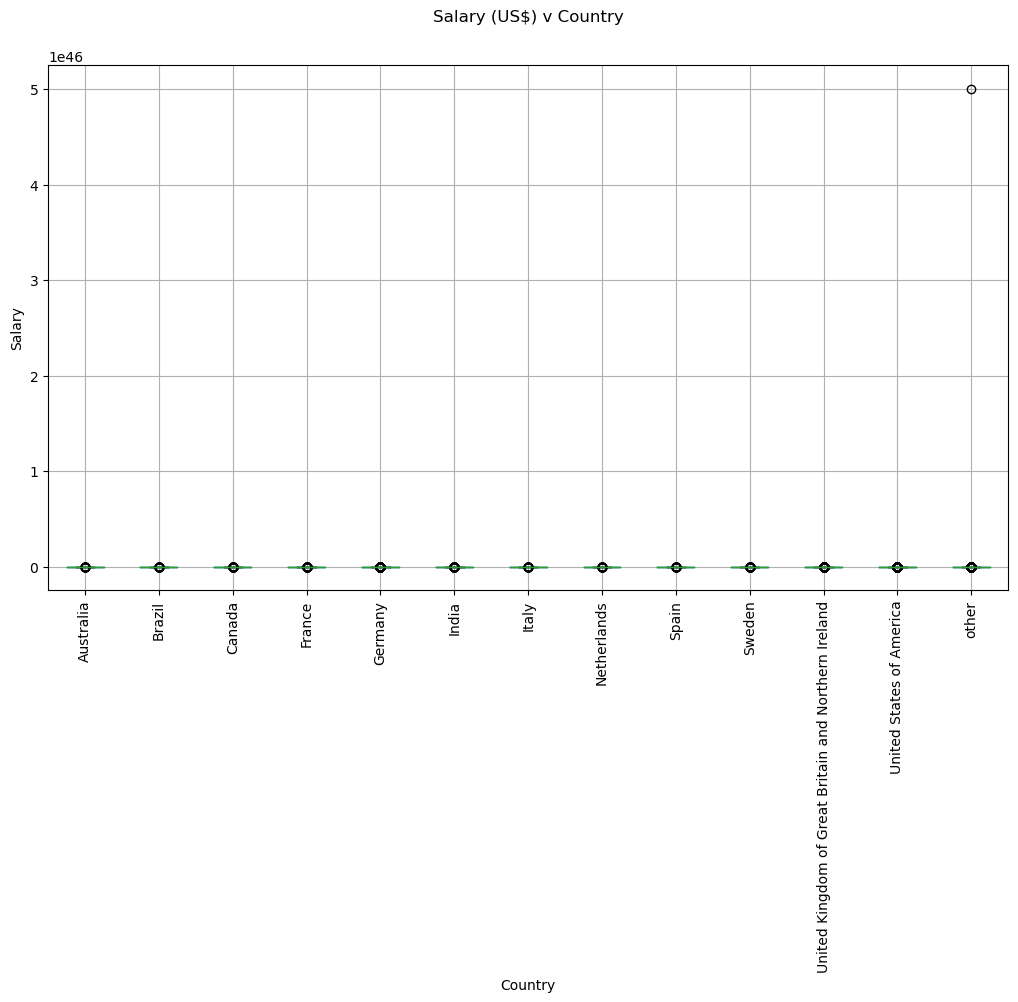

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [13]:
df = df[df['Salary'] <= 350000]
df = df[df['Salary'] >= 10000]
df = df[df['Country'] != 'other']

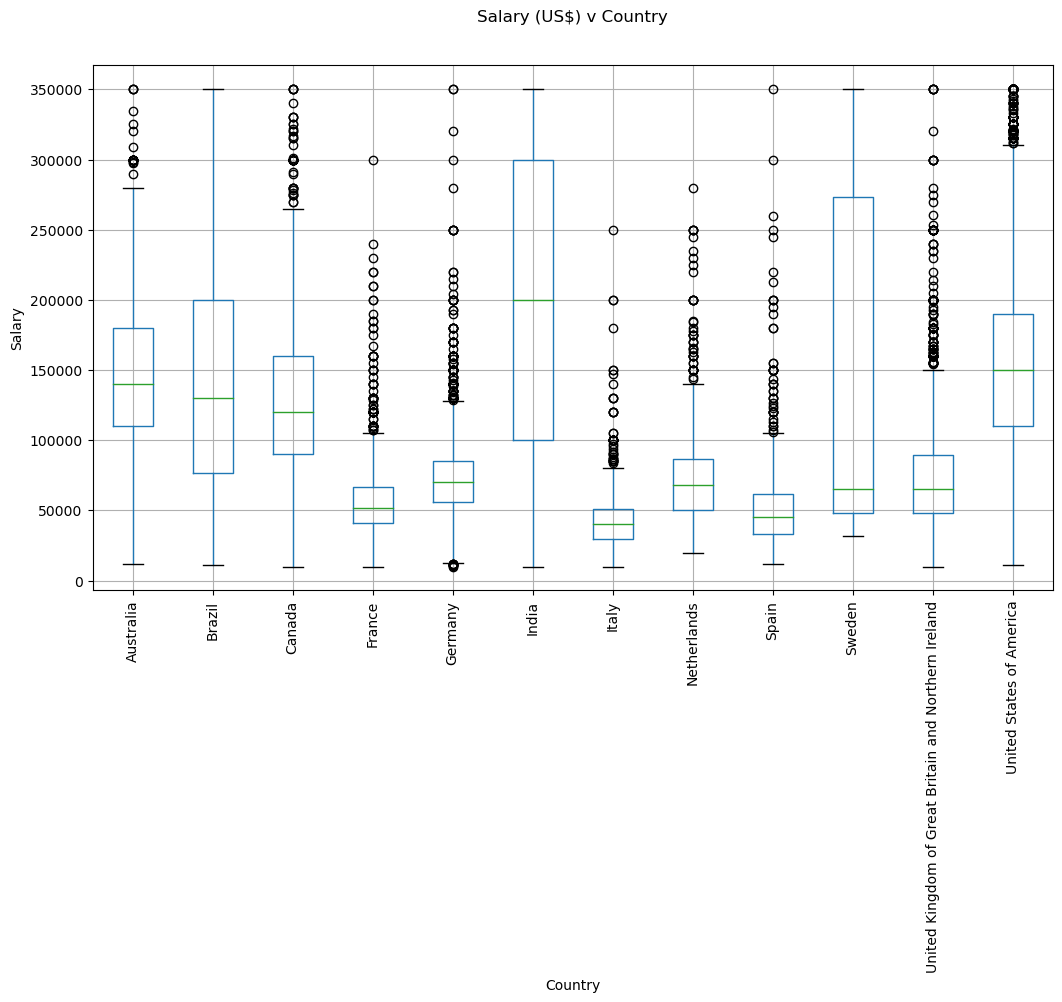

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [15]:
df['YearsCodePro'].unique() # having string on our data will mess up our predictions

array(['9', '23', '7', '21', '3', 'Less than 1 year', '10', '6', '14',
       '5', '2', '15', '13', '16', '24', '25', '12', '20', '18', '19',
       '27', '8', '4', '17', '43', '38', '33', '29', '22', '1', '11',
       '28', '42', '26', '31', '30', '36', '39', '34', '40', '32', '44',
       '37', '35', '48', 'More than 50 years', '45', '41', '50', '46',
       '49', '47'], dtype=object)

In [16]:
# this function take strings and change them to float 
def clean_Experience(x): 
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year' or x == 'nan':
        return 0.5
    return float(x)
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_Experience)

In [17]:
df['YearsCodePro'].unique() #we still have some value nan, we need to remove them

array([ 9. , 23. ,  7. , 21. ,  3. ,  0.5, 10. ,  6. , 14. ,  5. ,  2. ,
       15. , 13. , 16. , 24. , 25. , 12. , 20. , 18. , 19. , 27. ,  8. ,
        4. , 17. , 43. , 38. , 33. , 29. , 22. ,  1. , 11. , 28. , 42. ,
       26. , 31. , 30. , 36. , 39. , 34. , 40. , 32. , 44. , 37. , 35. ,
       48. , 50. , 45. , 41. , 46. , 49. , 47. ])

In [18]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [19]:
def clean_Education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    if "Master’s degree" in x:
        return "Master’s degree"
    if 'Professional degree' in x:
        return 'Post grad'
    return 'less than a Bachelor'

df['EdLevel'] = df['EdLevel'].apply(clean_Education)

In [20]:
df['EdLevel'].unique()

array(['Bachelor’s degree', 'less than a Bachelor', 'Master’s degree',
       'Post grad'], dtype=object)

/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

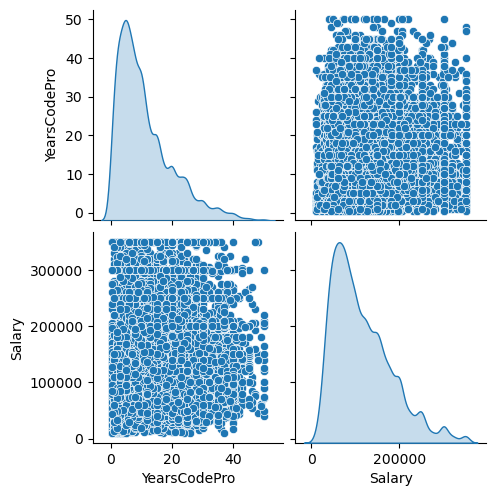

In [21]:
import seaborn as sns

sns.pairplot(data=df, diag_kind='kde')


## When working with inear regression or any other ML model we work with numbers not strings, what we can do is encode the strings entry we have on our data using LabelEncoder from sklearn.preprocessing.

In [22]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])

/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [23]:
df['EdLevel'].unique() # that's what we want 

array([0, 3, 1, 2])

### Now we can do the same thing to The country column.

In [24]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])

/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [25]:
df['Country'].unique()

array([11, 10,  0,  7,  4,  3,  8,  1,  6,  2,  5,  9])

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Feature Selection
X = df[['Country', 'EdLevel', 'YearsCodePro']]
y = df['Salary']

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Scaling numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Linear Regression:", r2_score(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_lr), np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print("Decision Tree:", r2_score(y_test, y_pred_dt), mean_absolute_error(y_test, y_pred_dt), np.sqrt(mean_squared_error(y_test, y_pred_dt)))

# Random Forest
Random_Forest = RandomForestRegressor(random_state=0)
Random_Forest.fit(X_train_scaled, y_train)  # Notice that we're fitting it on the scaled data
y_pred_rf = Random_Forest.predict(X_test_scaled)  # Make predictions on the scaled test data
print("Random Forest:", r2_score(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_rf), np.sqrt(mean_squared_error(y_test, y_pred_rf)))


/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and wil

Linear Regression: 0.13104402824513006 48625.414718720596 62373.790739026066
Decision Tree: 0.44500525244329936 34407.18905017387 49847.99438355424
Random Forest: 0.4591042871686907 34123.00304347268 49210.75435571404


/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstan

/var/folders/jm/1n6bvm0n0h10xpwfdht5zn000000gn/T/ipykernel_95068/3044294583.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color='r', label='Actual Values')
/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jaafarsafar/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versio

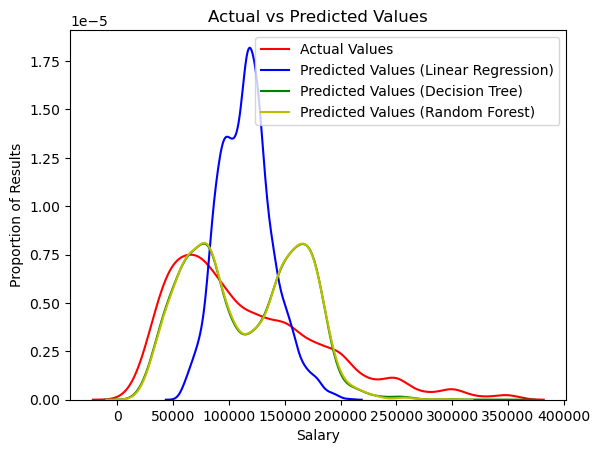

In [27]:
sns.distplot(y_test, hist=False, color='r', label='Actual Values')

# Distribution plot for predicted values from Linear Regression
sns.distplot(y_pred_lr, hist=False, color='b', label='Predicted Values (Linear Regression)')

# Distribution plot for predicted values from Decision Tree
sns.distplot(y_pred_dt, hist=False, color='g', label='Predicted Values (Decision Tree)')

sns.distplot(y_pred_rf, hist=False, color='y', label='Predicted Values (Random Forest)')

plt.title('Actual vs Predicted Values')
plt.xlabel('Salary')
plt.ylabel('Proportion of Results')
plt.legend()
plt.show()

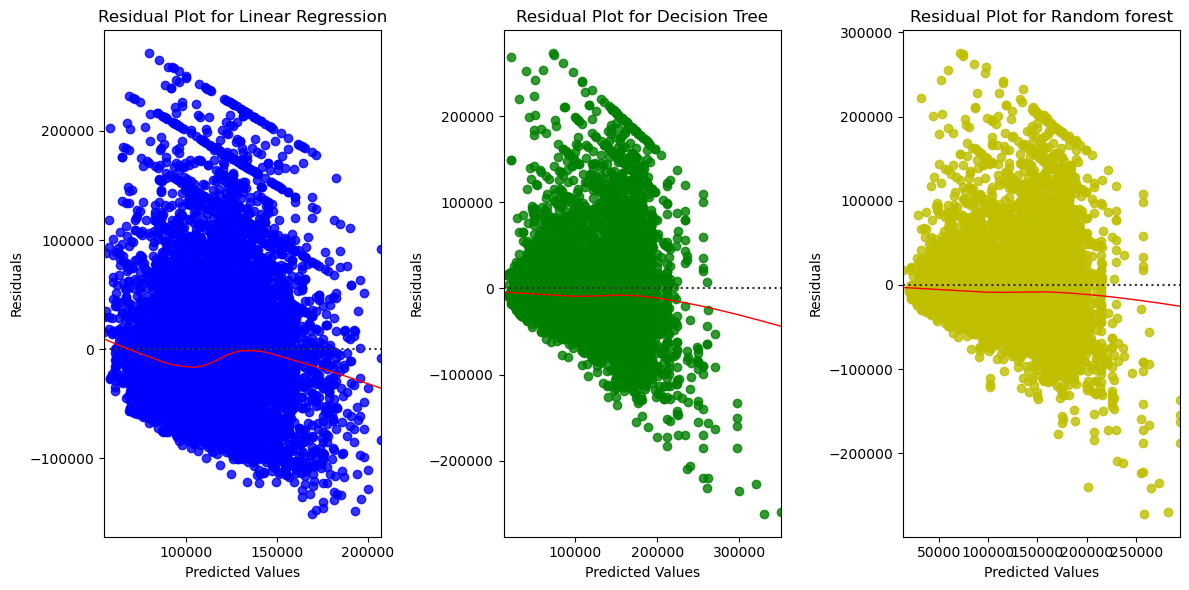

In [28]:
# Residuals for Linear Regression
residuals_lr = y_test - y_pred_lr

# Residuals for Decision Tree
residuals_dt = y_test - y_pred_dt

# Residuals for Random Forest
residuals_rf = y_test - y_pred_rf

# Plotting residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.residplot(x=y_pred_lr, y=residuals_lr, lowess=True, color='b', line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot for Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 3, 2)
sns.residplot(x=y_pred_dt, y=residuals_dt, lowess=True, color='g', line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot for Decision Tree')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 3, 3)
sns.residplot(x=y_pred_rf, y=residuals_dt, lowess=True, color='y', line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot for Random forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


In [29]:
X

,Country,EdLevel,YearsCodePro
1,11,0,9.0
2,11,0,23.0
3,11,0,7.0
5,10,3,21.0
6,11,3,3.0
...,...,...,...
89162,1,1,24.0
89170,3,1,9.0
89172,8,3,22.0
89175,11,0,8.0


In [37]:
# country, edlevel, yearscode 
X = np.array([["United States of America", "Master’s degree", 10]])
X

array([['United States of America', 'Master’s degree', '10']],
      dtype='<U24')

In [38]:
X[:, 0] = le_country.transform(X[:, 0])
X[:, 1] = le_education.transform(X[:, 1])
X = X.astype (float)
X


array([[11.,  1., 10.]])

In [48]:

predicted_salary_lr = lr.predict(X)
predicted_salary_dt = dt.predict(X)
predicted_salary_rf = Random_Forest.predict(X)

print(f"Predicted salary (Linear Regression): {predicted_salary_lr}")
print(f"Predicted salary (Decision Tree): {predicted_salary_dt}")
print(f"Predicted salary (Random Forest): {predicted_salary_rf}")
y_pred = Random_Forest.predict(X)
y_pred

Predicted salary (Linear Regression): [416863.82452922]
Predicted salary (Decision Tree): [151666.66666667]
Predicted salary (Random Forest): [174319.16666667]


array([174319.16666667])

In [49]:
 import pickle

In [53]:
data = {"model": Random_Forest, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [54]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [55]:
y_pred = regressor_loaded.predict(X)
y_pred

array([174319.16666667])